In [2]:
import jax.numpy as jnp
from jax import random,grad,jit
from jax.scipy.stats import norm
from AutoKSD import KSD
from AutoSVGD import SVGD
import matplotlib.pyplot as plt

In [3]:
def MoG(alpha,mu=[-5.,5.],std=[1.,1.]):
    mog_prob=jit(lambda x:alpha*norm.pdf(x, loc=mu[0], scale=std[0])+(1-alpha)*norm.pdf(x, loc=mu[1], scale=std[1]))
    mog_log_prob=jit(lambda x:jnp.log(mog_prob(x)))
    mog_score=grad(lambda x:mog_log_prob(x).sum())
    return mog_prob,mog_log_prob,mog_score  

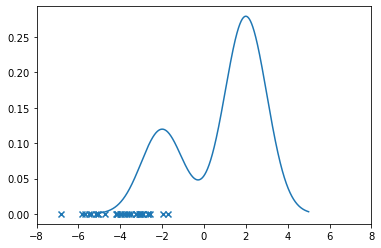

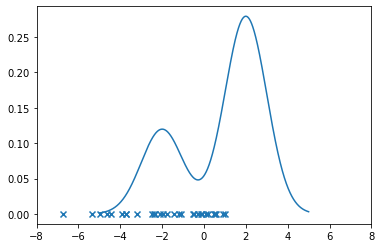

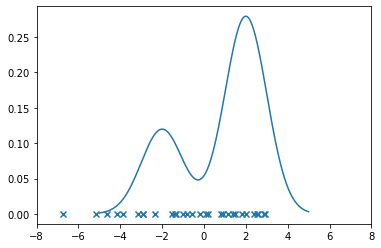

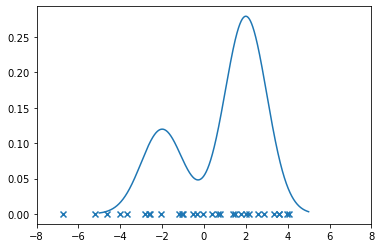

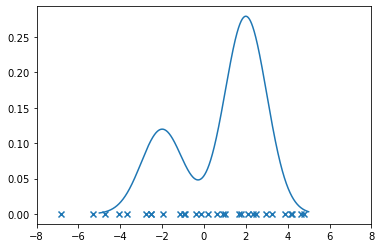

In [8]:
mog_prob,mog_log_prob,mog_score= MoG(alpha=0.3,mu=[-2.,2.],std=[1.,1.])

sample_num=30
rbf=lambda x,y:jnp.exp(-0.5*jnp.sum((x-y)**2))
svgd=SVGD(rbf,mog_score)
key = random.PRNGKey(3)
samples=random.normal(key,[sample_num,1])-4
for i in range(0,201):
    samples=svgd.update(samples,lr=0.1)
    if i%50==0:
        x_grid=jnp.linspace(-5,5,10000)
        y_pdf=mog_prob(x_grid)
        plt.plot(x_grid,y_pdf)
        plt.scatter(samples, jnp.zeros(samples.shape[0]),alpha=1,marker='x')
        plt.xlim(-8,8)
        plt.show()